# List resnet models from torch hub

In [4]:
from local_utilities import get_model_list
get_model_list()

['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']

# Test TinyImageNetDatModule

/Users/galimalki/PycharmProjects/jupyterNotebooks/dl-fundamentals/unit07-computer-vision/exercises/solution
/Users/galimalki/PycharmProjects/jupyterNotebooks/dl-fundamentals/unit07-computer-vision/exercises/solution


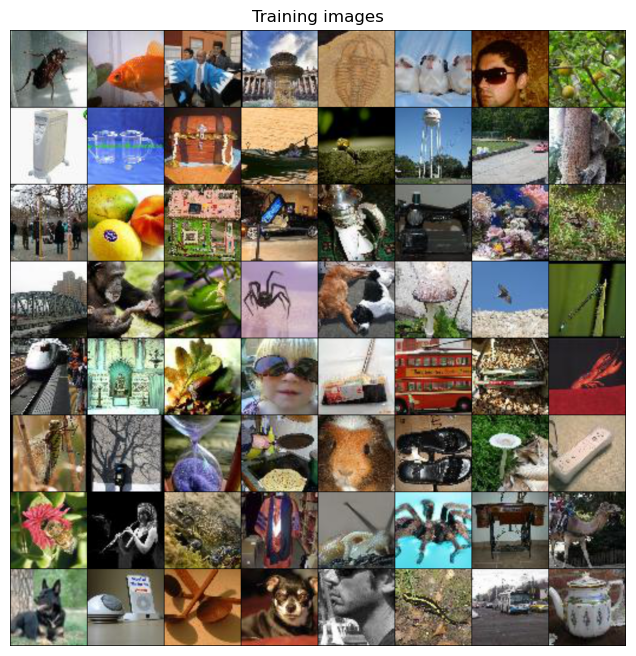

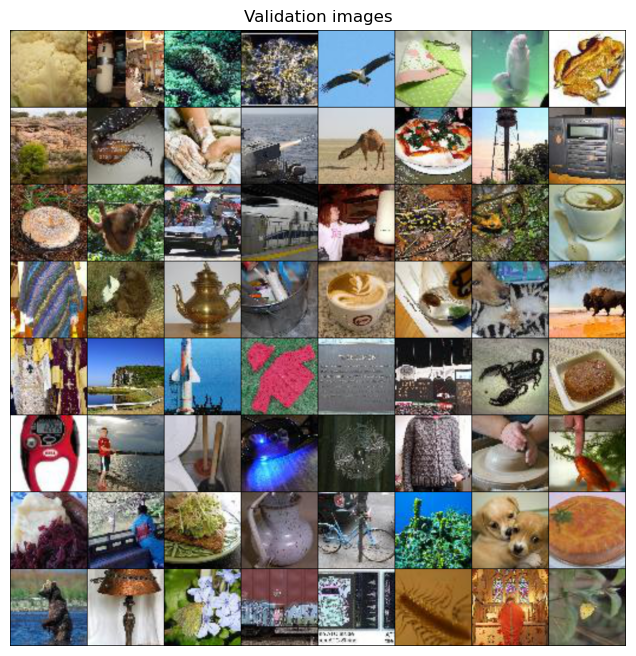

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from local_utilities import LightningModel, TinyImageNetDataModule

dm = TinyImageNetDataModule(height_width=(224, 224), batch_size=64, num_workers=0)
dm.prepare_data()
dm.setup()

#print(f'dm.train.size = {len(dm.train)}')
#for i in range(len(dm.train)):
#    img, label = dm.train[i]
#    if img.shape != (3, 224, 224):
#        print(f'image[{i}].shape = {img.shape}')
#        print(f'image[{i}].path = {dm.train.images[i]} , image[{i}].label={label}')
#    print(f'image[{i}].shape = {img.shape}, label[{i}] = {label}')
#
#print(f'dm.val.size = {len(dm.val)}')
#for i in range(len(dm.val)):
#    img, label = dm.val[i]
#    print(f'image[{i}].shape = {img.shape}, label[{i}] = {label}')


for batch, (images, labels) in enumerate(dm.val_dataloader()):  
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title("Training images")
    plt.imshow(np.transpose(torchvision.utils.make_grid(
        images[:64], 
        padding=2,
        normalize=True),
        (1, 2, 0)))
    plt.show()
    # print(f"Batch {batch}: len(images) = {len(images)}, len(labels) = {len(labels)}")
    break


for batch, (images, labels) in enumerate(dm.train_dataloader()):  
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title("Validation images")
    plt.imshow(np.transpose(torchvision.utils.make_grid(
        images[:64], 
        padding=2,
        normalize=True),
        (1, 2, 0)))
    plt.show()
    # print(f"Batch {batch}: len(images) = {len(images)}, len(labels) = {len(labels)}")
    break




# Training/Validation loss and accuracy

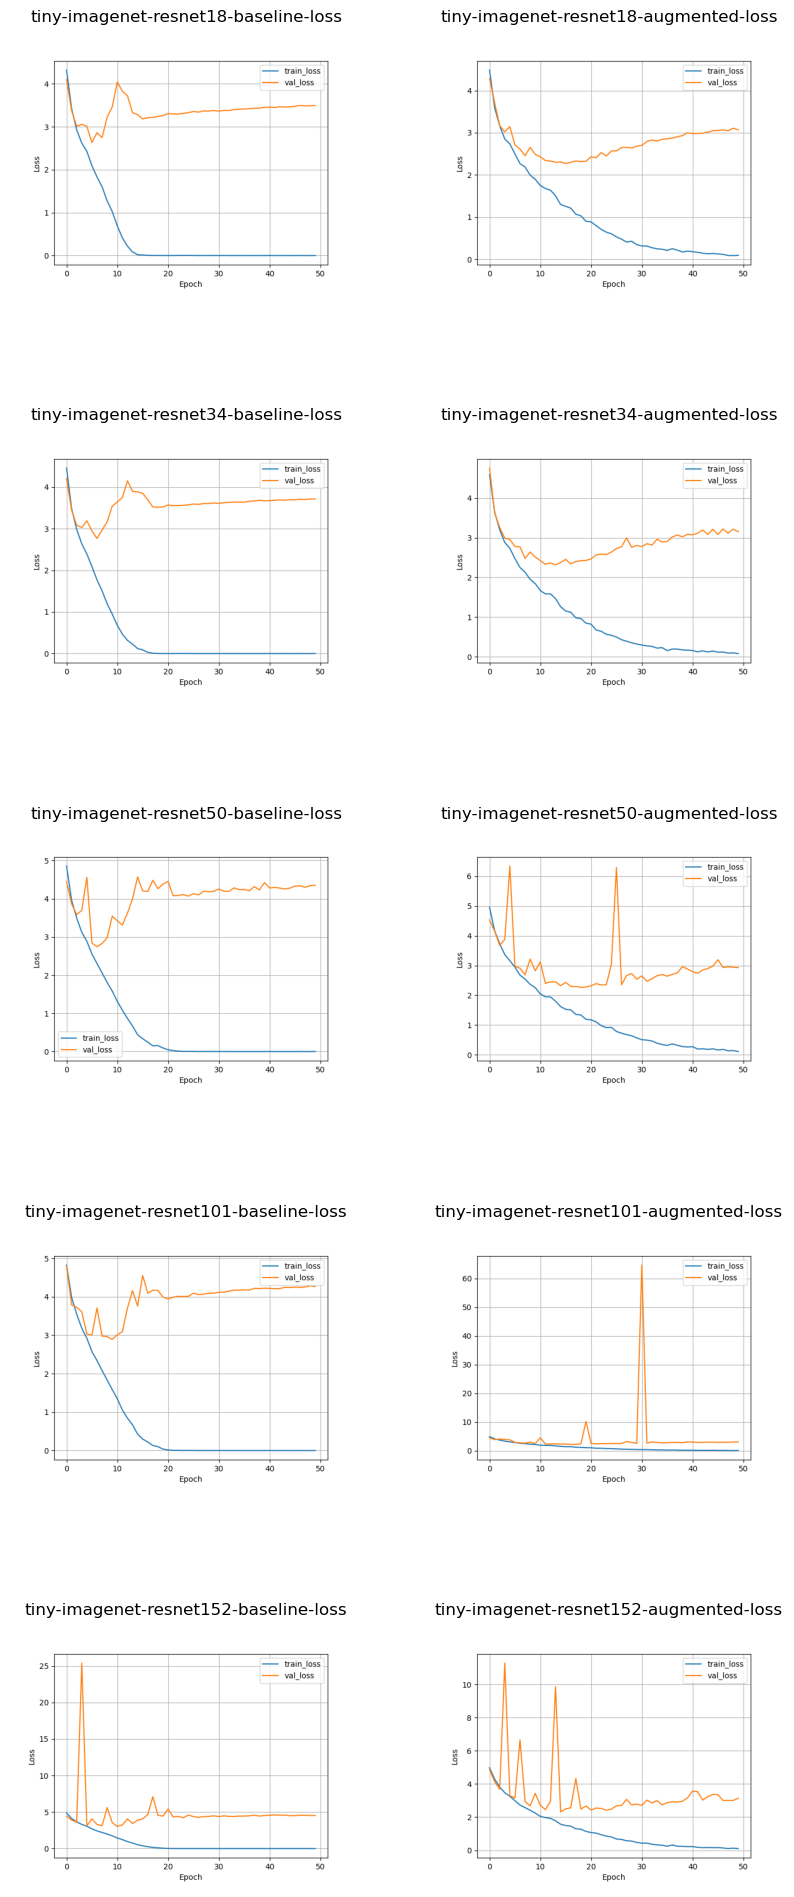

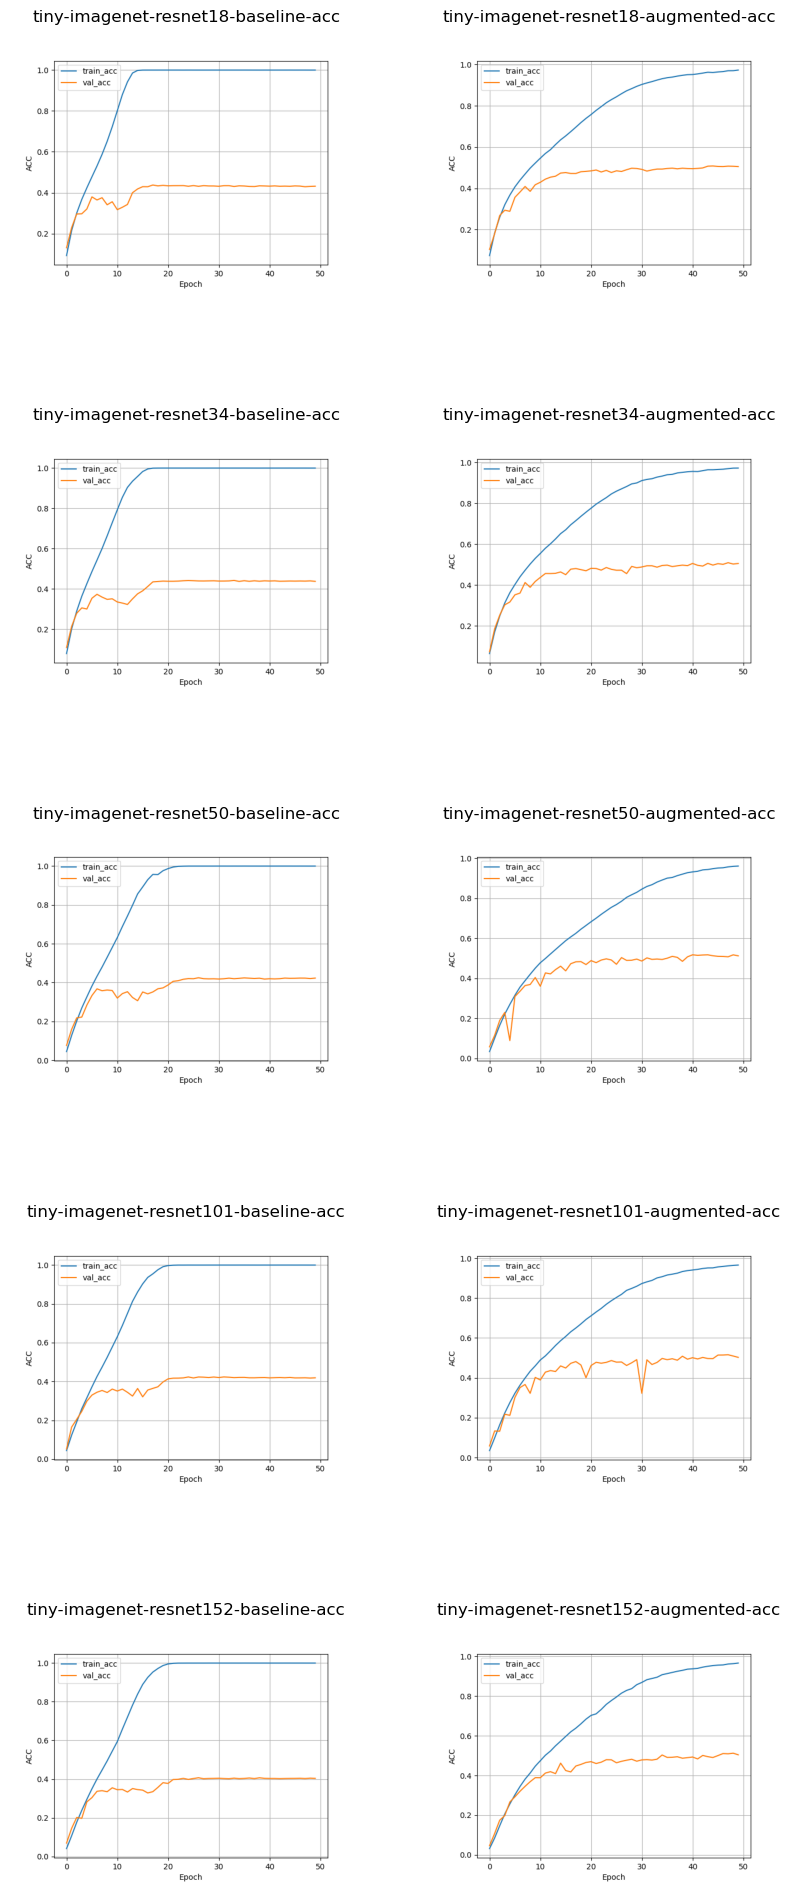

In [14]:
import matplotlib.pyplot as plt
from local_utilities import get_model_list
from PIL import Image

for metric_type in ['loss', 'acc']:
    model_list = get_model_list()
    num_rows = len(model_list)
    num_cols = 2

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
    plt.title(f"Training and validation {metric_type}")
    plt.axis("off")

    for row, resnet_type in enumerate(model_list):
        for col, augmentation in enumerate(['baseline', 'augmented']):
                title = f"tiny-imagenet-{resnet_type}-{augmentation}-{metric_type}"
                img = Image.open(f"images/{title}.png")
                axs[row, col].imshow(img)
                axs[row, col].set_title(title)
                axs[row, col].axis("off")
    plt.show()

# Test models

In [16]:
import pytorch_lightning as L
import torch
from pytorch_lightning.loggers import CSVLogger
from local_utilities import LightningModel, TinyImageNetDataModule, get_model_list

def test_model(resnet_type, augmentation):
    model_name = f"tiny-imagenet-{resnet_type}-{augmentation}"
    print(f"testing model {model_name}")

    if augmentation == "augmented":
        augment_data = True
    else:
        augment_data = False   

    dm = TinyImageNetDataModule(height_width=(224, 224), batch_size=64, num_workers=4, augment_data=augment_data)
   
    pytorch_model = torch.hub.load('pytorch/vision', resnet_type, weights=None)
    pytorch_model.load_state_dict(torch.load(f"{model_name}.pt"))

    L.pytorch.seed_everything(123)

    lightning_model = LightningModel(model=pytorch_model, learning_rate=0.1)

    trainer = L.Trainer(
        max_epochs=50,
        accelerator="gpu",
        devices=1,
        logger=CSVLogger(save_dir="logs/", name=model_name),
        deterministic=True,
    )

    trainer.test(model=lightning_model, datamodule=dm)

model_list = get_model_list()
for model in model_list:
    test_model(model, "baseline")
    test_model(model, "augmented")

testing model tiny-imagenet-resnet18-baseline


Using cache found in /Users/galimalki/.cache/torch/hub/pytorch_vision_main


FileNotFoundError: [Errno 2] No such file or directory: 'tiny-imagenet-resnet18-baseline.pt'